In [1]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from plotting import CandlePlot

C:\Users\ds301\AppData\Local\Temp\ipykernel_22920\911522230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pair = "EUR_USD"
granularity="H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")

In [3]:
df.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [4]:
df_ma = df[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [10]:
df_ma.tail()

,time,mid_o,mid_h,mid_l,mid_c,MA_10
3987,2024-01-19 02:00:00+00:00,1.08854,1.08898,1.08796,1.08810,1.087804
3988,2024-01-19 06:00:00+00:00,1.08806,1.08864,1.08680,1.08831,1.087964
3989,2024-01-19 10:00:00+00:00,1.08828,1.08932,1.08731,1.08807,1.087950
3990,2024-01-19 14:00:00+00:00,1.08806,1.08935,1.08657,1.08898,1.087886
3991,2024-01-19 18:00:00+00:00,1.08898,1.08978,1.08858,1.08976,1.087912


In [11]:
df_ma['MA_10'] = df_ma.mid_c.rolling(window=10).mean()
df_ma.dropna(inplace=True)
df_ma.reset_index(inplace=True, drop=True)

In [12]:
df_plot = df_ma.iloc[:100]

In [13]:
cp = CandlePlot(df_plot)

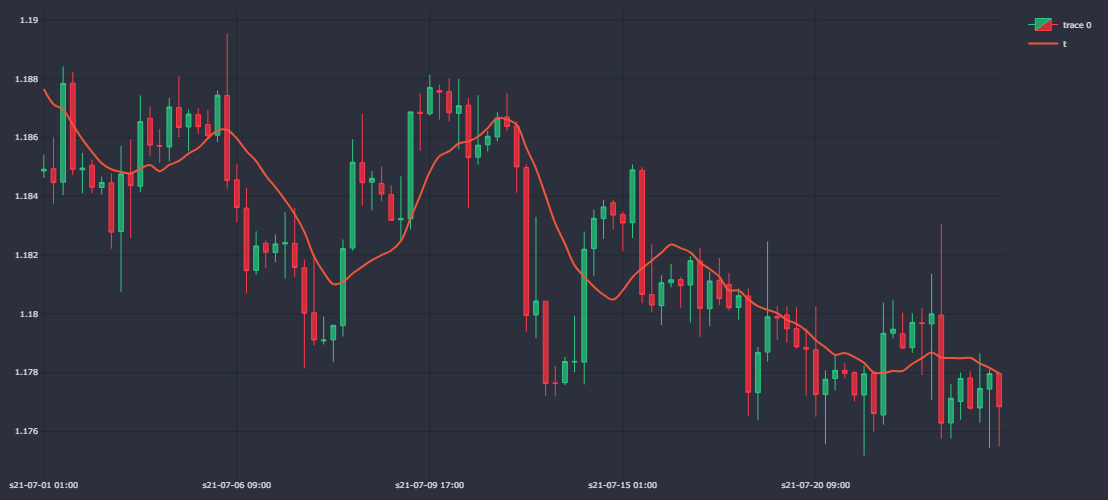

In [14]:
#cp.fig.add_trace(go.Scatter(
#    x=cp.df_plot.sTime,
#    y=cp.df_plot.MA_10,
#    line=dict(width=2),
#    line_shape="spline",
#    name="MA_10"
#))
cp.show_plot(line_traces=['MA_10'])